# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [43]:
# Checking the number of mice.
mouse_results["Mouse ID"].nunique()

249

In [44]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#Obtain a boolean list of which rows are duplicates and add as column.
mouse_results["Duplicate"] = mouse_results.duplicated(["Mouse ID","Timepoint"], keep = False)
#Creat duplicate dataframe
mouse_results_dups = mouse_results.loc[mouse_results["Duplicate"] == True]
#select Mouse ID from duplicate dataframe
dups_row = mouse_results_dups.drop_duplicates(subset = "Mouse ID")
dups_row["Mouse ID"]

908    g989
Name: Mouse ID, dtype: object

In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_clean = mouse_results.loc[mouse_results["Mouse ID"] != "g989"]
mouse_results_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [51]:
# Checking the number of mice in the clean DataFrame.
mouse_results_clean["Mouse ID"].nunique()

248

## Summary Statistics

In [95]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mouse_group = mouse_results_clean.groupby("Drug Regimen")

mouse_table = pd.DataFrame({"Mean Tumor Volume":mouse_group["Tumor Volume (mm3)"].mean(),
                           "Mean Tumor Median":mouse_group["Tumor Volume (mm3)"].median(),
                           "Tumor Volume Variance":mouse_group["Tumor Volume (mm3)"].var(),
                           "Tumor Volume Std. Dev.":mouse_group["Tumor Volume (mm3)"].std(),
                           "Tumor Volume Std Err.":mouse_group["Tumor Volume (mm3)"].sem()})

mouse_table



,Mean Tumor Volume,Mean Tumor Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [107]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
mouse_agg = mouse_results_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":{"sem","std","var","median","mean"}})
                                                            
# Using the aggregation method, produce the same summary statistics in a single line
mouse_agg

Tumor Volume (mm3)                                          
                            var       std       mean       sem     median
Drug Regimen                                                             
Capomulin             24.947764  4.994774  40.675741  0.329346  41.557809
Ceftamin              39.290177  6.268188  52.591172  0.469821  51.776157
Infubinol             43.128684  6.567243  52.884795  0.492236  51.820584
Ketapril              68.553577  8.279709  55.235638  0.603860  53.698743
Naftisol              66.173479  8.134708  54.331565  0.596466  52.509285
Placebo               61.168083  7.821003  54.033581  0.581331  52.288934
Propriva              43.852013  6.622085  52.320930  0.544332  50.446266
Ramicane              23.486704  4.846308  40.216745  0.320955  40.673236
Stelasyn              59.450562  7.710419  54.233149  0.573111  52.431737
Zoniferol             48.533355  6.966589  53.236507  0.516398  51.818479

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

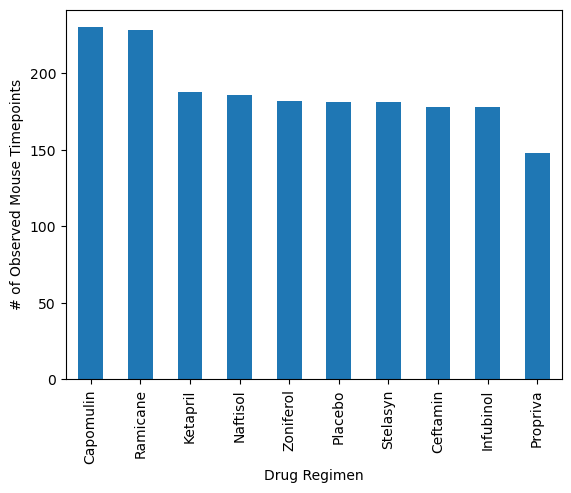

In [136]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_group = mouse_results_clean.groupby("Drug Regimen")
mouse_plot = mouse_group["Timepoint"].count()
mouse_sort = mouse_plot.sort_values(ascending=False)
mouse_sort.plot.bar()
plt.ylabel("# of Observed Mouse Timepoints")

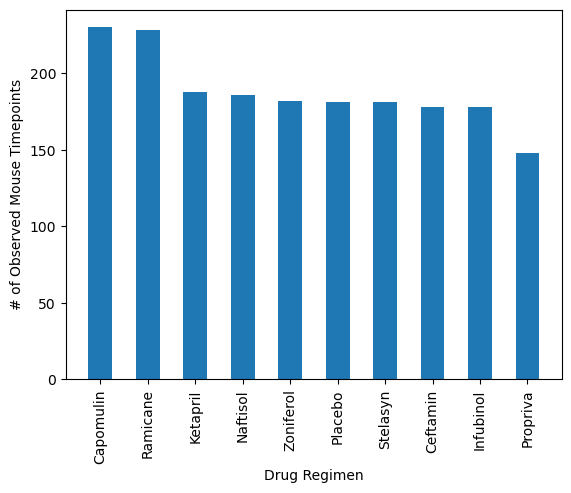

In [138]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#x_values = mouse_results_clean["Drug Regimen"].unique()
#mouse_group = mouse_results_clean.groupby("Drug Regimen")
#y_values = mouse_group["Timepoint"].count()
mouse_group = mouse_results_clean.groupby("Drug Regimen")
mouse_plot = mouse_group["Timepoint"].count()
mouse_sort = mouse_plot.sort_values(ascending=False)
x_values = mouse_sort.index.values
y_values = mouse_sort

plt.bar(x_values, y_values, width = .5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

Text(0, 0.5, 'Sex')

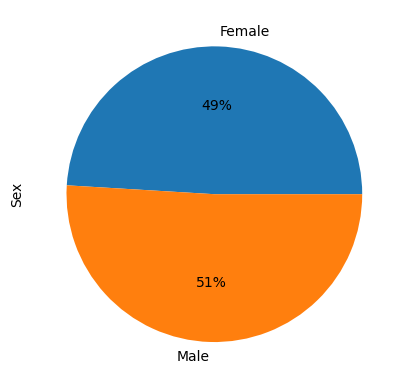

In [157]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = mouse_results_clean.groupby("Sex")["Mouse ID"].count()
mouse_sex.plot.pie(autopct='%1.0f%%')
plt.ylabel("Sex")

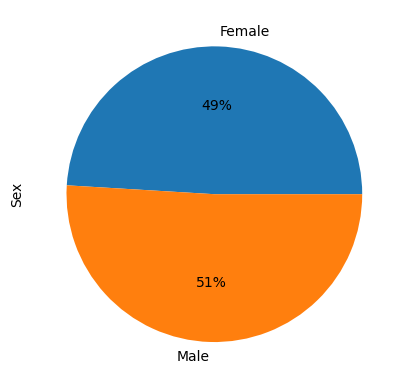

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex = mouse_results_clean.groupby("Sex")["Mouse ID"].count()
data = mouse_sex
labels = mouse_sex.index.values
plt.ylabel("Sex")

plt.pie(data, labels = labels, autopct='%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [169]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_last_tp = mouse_results_clean.groupby("Mouse ID")["Timepoint"].max("Timepoint")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_merge = pd.merge(mouse_last_tp, mouse_results_clean, how="left", on = ["Mouse ID", "Timepoint"])
mouse_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicate
0,a203,45,Infubinol,Female,20,23,67.973419,2,False
1,a251,45,Infubinol,Female,21,25,65.525743,1,False
2,a262,45,Placebo,Female,17,29,70.717621,4,False
3,a275,45,Ceftamin,Female,20,28,62.999356,3,False
4,a366,30,Stelasyn,Female,16,29,63.440686,1,False


In [178]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in mouse_merge.iterrows():
    if row["Drug Regimen"] in treatments:
        tumor_vol.append([row["Drug Regimen"], row["Tumor Volume (mm3)"]])
    
    # add subset 
cap_tumor_vol = tumor_vol[]
    
    # Determine outliers using upper and lower bounds


[['Infubinol', 67.97341878],
 ['Infubinol', 65.52574285],
 ['Ceftamin', 62.99935619],
 ['Ramicane', 38.4076183],
 ['Ramicane', 43.0475426],
 ['Ramicane', 38.81036633],
 ['Infubinol', 57.03186187],
 ['Ramicane', 32.97852192],
 ['Infubinol', 66.08306589],
 ['Capomulin', 38.98287774],
 ['Ceftamin', 45.0],
 ['Ceftamin', 56.05774909],
 ['Capomulin', 38.93963263],
 ['Ceftamin', 55.74282869],
 ['Infubinol', 72.2267309],
 ['Infubinol', 36.3213458],
 ['Ramicane', 38.34200823],
 ['Ramicane', 33.39765251],
 ['Infubinol', 60.96971133],
 ['Ramicane', 37.31123552],
 ['Infubinol', 62.43540402],
 ['Ramicane', 40.65900627],
 ['Infubinol', 60.91876652],
 ['Ceftamin', 48.72207785],
 ['Capomulin', 30.48598484],
 ['Capomulin', 37.07402422],
 ['Capomulin', 40.1592203],
 ['Ramicane', 29.12847181],
 ['Ceftamin', 47.7846818],
 ['Ramicane', 33.56240217],
 ['Ramicane', 36.37451039],
 ['Infubinol', 67.28962147],
 ['Capomulin', 47.68596303],
 ['Capomulin', 37.31184577],
 ['Capomulin', 38.1251644],
 ['Capomulin', 3

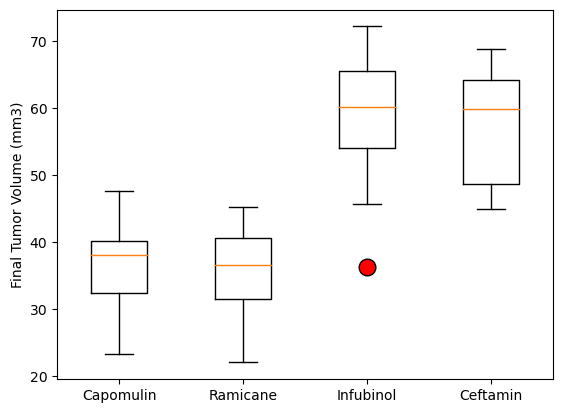

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

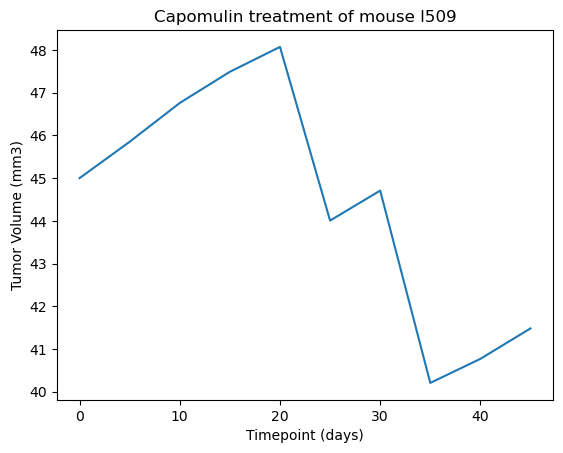

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


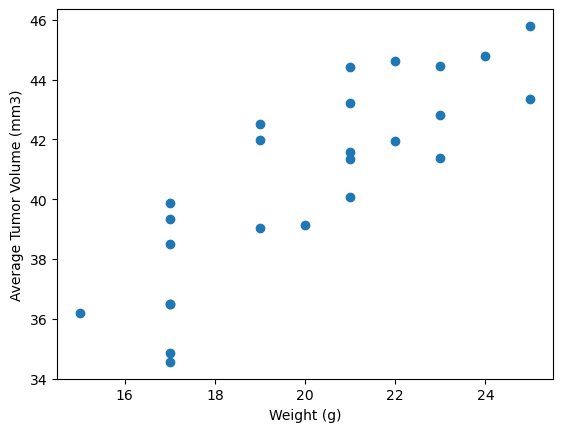

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


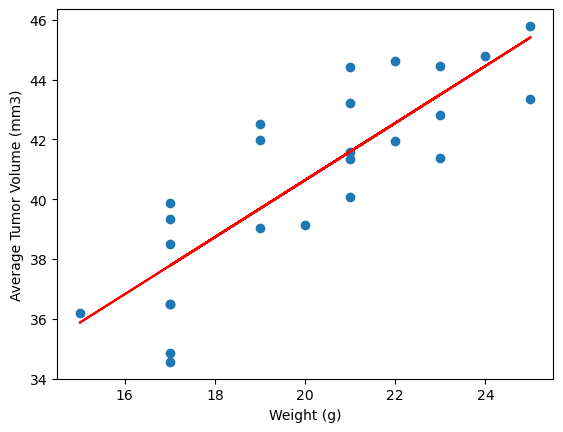

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
